# K-Fold Cross Validation

Please refer to the following documentation from Scikit-Learn to understand the concepts related with K-Fold Cross Validation.

Reference: https://isheunesu48.medium.com/cross-validation-using-k-fold-with-scikit-learn-cfc44bf1ce6#:~:text=Lets%20take%20the%20scenario%20of,serve%20as%20the%20training%20set.

In this lab we are going to implement a SVC model using k-fold cross validation.

The Iris Dataset that avaiable in Scikit-Learn Datasets will be utilized during this task.

Dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris



In [27]:
# Load the necessary libararies

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [2]:
# Load the dataset

iris = datasets.load_iris()

In [3]:
# Print the data columns

iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
# Print the target column

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Print the model feature names

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Text(0.5, 1.0, 'Plot of Sepal Length vs Sepal Width')

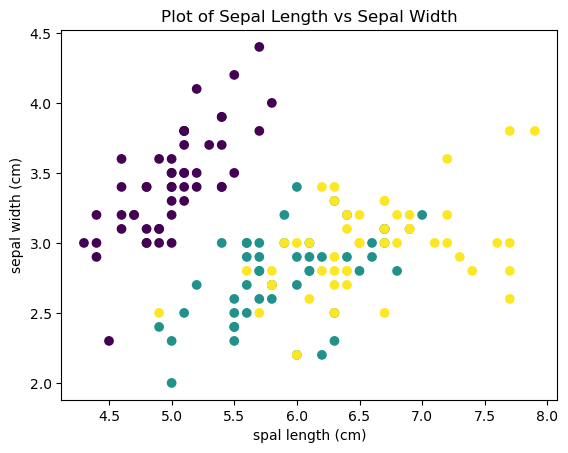

In [13]:
# Select two features from the above features and plot the dataset in the 2D space using matplotlib scatterplots

import matplotlib.pyplot as plt

plt.scatter(iris.data[:,0],iris.data[:,1], c=iris.target) #iris.data[:,0] will extract all the rows of the 0th column (sepeal length(cm) in this case)
plt.xlabel("spal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Plot of Sepal Length vs Sepal Width")

In [14]:
# Seperate the features and target from the dataset.
# Name them as X and y respectively

# Your code here
X = iris.data
y = iris.target

In [15]:
# Display the shape of the feature set and target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [17]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Print the train and test set sizes

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [21]:
# Scale the data using scikit-learn standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Define SVC Classifier with default parameters

clf = svm.SVC()

In [24]:
# Estimate the accuracy of the model with k-fold cross validation.
# Use 'cross_val_score' function provided with scikit-learn to obtain the accuracy for each split
# use k = 5

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)

In [25]:
# Print the calculated scores

scores

array([0.95833333, 1.        , 0.83333333, 1.        , 0.95833333])

In [30]:
# Calculate the mean and standard deviation of the accuracy scores obtained via k-fold cross validation
# Use numpy functions

print("average accuracy: ", np.mean(scores))
print("std: ", np.std(scores))

average accuracy:  0.95
std:  0.06123724356957944


In [31]:
# Fit the model once again with whole training dataset without cross validation.
# Test the model performance with test set

clf.fit(X_train_scaled, y_train)

SVC()

In [32]:
print("train_accuracy: ", clf.score(X_train_scaled, y_train))
print("test_accuracy: ", clf.score(X_test_scaled, y_test))

train_accuracy:  0.9666666666666667
test_accuracy:  1.0
